# Model Analysis

Using this notebook to plot graphs and check out the performances of the different models we have tried

In [1]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from src.shared_funcs import read_csv
from sklearn.metrics import roc_curve, auc

## Latest Model

Plot accuracy and loss over epochs

In [2]:
path_results = '../SBWR_BTNR_CCNR/Results/SBWR_Phase1/Mo_0.7_08/FT_6Wks/'

hp = pd.read_csv(path_results+'hyperparameter_records.csv', sep = ",")
acc_loss = pd.read_csv(path_results+'train_val_results.csv', sep = ",")

train_acc = acc_loss.TrainAcc
train_loss = acc_loss.TrainLoss
val_acc = acc_loss.ValAcc
val_loss = acc_loss.ValLoss

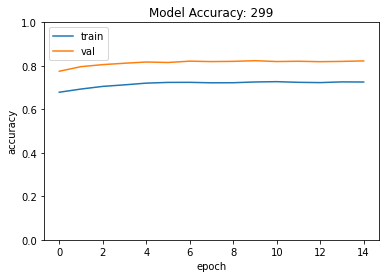

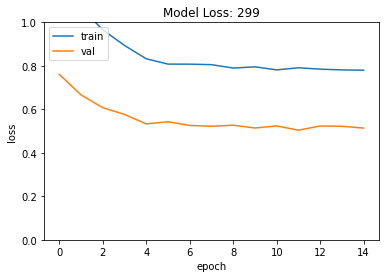

In [3]:
def simple_plot(list1, list2, title, y_lab, x_lab):
    plt.plot(list1)
    plt.plot(list2)
    plt.title(title)
    plt.ylabel(y_lab)
    plt.xlabel(x_lab)
    plt.legend(['train', 'val'], loc='upper left')
    plt.ylim(0, 1)
    plt.show()

archi = hp.at[12, 'Values']
simple_plot(train_acc, val_acc, 'Model Accuracy: '+archi, 'accuracy', 'epoch')
simple_plot(train_loss, val_loss, 'Model Loss: '+archi, 'loss', 'epoch')

Plot ROC curve on test results

In [4]:
probs = pd.read_csv(path_results + 'test_probabilities.csv', sep = ",")
y_test_file = './data/splits/Y_test_sbwr_phase1.csv'

y_test = [int(i) in {0,1} for i in read_csv(y_test_file)] #Set empty and human images as the positive
probs["prob_human_empty"] = probs["prob_empty"] + probs["prob_human"]
fpr, tpr, thresholds = roc_curve(y_test, probs.prob_human_empty)

roc_auc = auc(fpr, tpr)

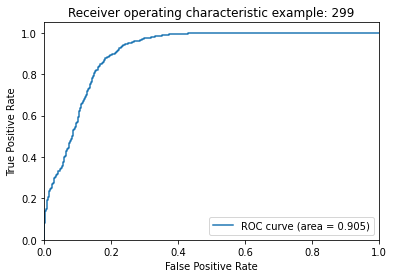

In [5]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example: '+archi)
plt.legend(loc="lower right")
plt.show()